In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

/Users/khirotaka/PycharmProjects/tutorial_kedro/env/tutorial/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# context は kedro jupyter notebook で立ち上げた場合、自動的に定義される変数
df = context.catalog.load("example_iris_data")

df.head()

2021-01-16 12:39:47,291 - kedro.io.data_catalog - INFO - Loading data from `example_iris_data` (CSVDataSet)...


/Users/khirotaka/PycharmProjects/tutorial_kedro/env/tutorial/lib/python3.8/site-packages/kedro/framework/context/context.py:469: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/Users/khirotaka/PycharmProjects/tutorial_kedro/tutorial/conf/base', '/Users/khirotaka/PycharmProjects/tutorial_kedro/tutorial/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
context.params

{'example_test_data_ratio': 0.2,
 'sklearn_model_criterion': 'gini',
 'sklearn_model_seed': 0,
 'sklearn_model_max_leaf_nodes': 100}

In [13]:
species = df["species"].unique()

/Users/khirotaka/PycharmProjects/tutorial_kedro/env/tutorial/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

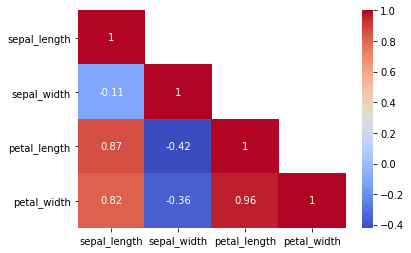

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=np.triu(np.ones((4, 4)), k = 1))

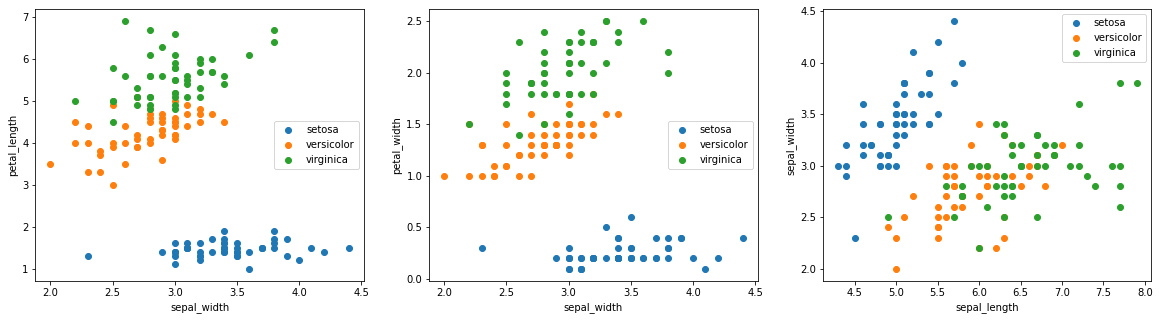

In [15]:
fig = plt.figure(facecolor="white", figsize=(20, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(
    df[df["species"] == species[0]]["sepal_width"],
    df[df["species"] == species[0]]["petal_length"],
    label=species[0]
)
ax1.scatter(
    df[df["species"] == species[1]]["sepal_width"],
    df[df["species"] == species[1]]["petal_length"],
    label=species[1]
)
ax1.scatter(
    df[df["species"] == species[2]]["sepal_width"],
    df[df["species"] == species[2]]["petal_length"],
    label=species[2]
)

ax1.set_xlabel("sepal_width")
ax1.set_ylabel("petal_length")
ax1.legend()

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(
    df[df["species"] == species[0]]["sepal_width"],
    df[df["species"] == species[0]]["petal_width"],
    label=species[0]
)
ax2.scatter(
    df[df["species"] == species[1]]["sepal_width"],
    df[df["species"] == species[1]]["petal_width"],
    label=species[1]
)
ax2.scatter(
    df[df["species"] == species[2]]["sepal_width"],
    df[df["species"] == species[2]]["petal_width"],
    label=species[2]
)

ax2.set_xlabel("sepal_width")
ax2.set_ylabel("petal_width")
ax2.legend()

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(
    df[df["species"] == species[0]]["sepal_length"],
    df[df["species"] == species[0]]["sepal_width"],
    label=species[0]
)
ax3.scatter(
    df[df["species"] == species[1]]["sepal_length"],
    df[df["species"] == species[1]]["sepal_width"],
    label=species[1]
)
ax3.scatter(
    df[df["species"] == species[2]]["sepal_length"],
    df[df["species"] == species[2]]["sepal_width"],
    label=species[2]
)

ax3.set_xlabel("sepal_length")
ax3.set_ylabel("sepal_width")
ax3.legend()


In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [17]:
data = df[["sepal_width", "petal_length", "petal_width"]]
targets = df["species"]

In [18]:
skf = StratifiedKFold(random_state=0, shuffle=True)
results = cross_validate(KNN(3), data, targets, cv=skf, n_jobs=-1)

In [19]:
mean = results["test_score"].mean()
std = results["test_score"].std()

/Users/khirotaka/PycharmProjects/tutorial_kedro/env/tutorial/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print("CV Score: {:.4f} ± {:.4f}".format(mean, std))

CV Score: 0.9467 ± 0.0267
